<a href="https://colab.research.google.com/github/ajiggody/Traffic-Sign-Classification/blob/master/Traffic_Sign_Classification_using_LeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Code to classify Traffic signs using LeNet architecture in Keras







## Problem Definition

- In this case study, I am provided with images of traffic signs & the goal is to train a Deep Learning Network to classify them
- The dataset contains 43 different classes of images.
- Classes are as listed below:
  - (0, b'Speed limit (20km/h)')(1, b'Speed limit (30km/h)')
  - (2, b'Speed limit (50km/h)')(3, b'Speed limit (60km/h)')
  - (4, b'Speed limit (70km/h)')(5, b'Speed limit (80km/h)')
  - (6, b'Speed limit (80km/h)')(7, b'Speed limit (100km/h)')
  - (8, b'Speed limit (120km/h)')(9, b'No passing')
  - (10, b'No passing for vehicles over 3.5 metric tons')
  - (11, b'Right-of-way at the next intersection')(12, b'Priority road')
  - (13, b'Yield')(14, b'Stop')(15, b'No vehicles')
  - (16, b'Vehicles over 3.5 tons prohibited')(17, b'No entry')
  - (18, b'General caution')(19, b'Dangerous curve to the left')
  - (20, b'Dangerous curve to the right')(21, b'Double curve')
  - (22, b'Bumpy road')(23, b'Slippery road')
  - (24, b'Road narrows on the right')(25, b'Road work')
  - (26, b'Traffic signals')(27, b'Pedestrians')(28, b'Children crossing')
  - (29, b'Bicycles crossing')(30, b'Beware of ice/snow')
  - (31, b'Wild animals crossing')(1, b'Speed limit (30km/h)')
  - (32, b'End of all speed & passing limits')(33, b'Turn right ahead')
  - (34, b'Turn left ahead')(35, b'Ahead only')(36, b'Go straight or right')
  - (37, b'Go straight or go left')(38, b'Keep right')(39, b'Keep left')
  - (40, b'Roundabout mandatory')(41, b'End of no passing')
  - (42, b'End of no passing by vehicles over 3.5 metric tons')

In [ ]:
# Import libraries & datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
import os
# Define the path to the folder where your data files are located
folder_path = "/content/drive/MyDrive/Traffic Sign Classification/"

# Define the file paths
train_file = os.path.join(folder_path, "train.p")
valid_file = os.path.join(folder_path, "valid.p")
test_file = os.path.join(folder_path, "test.p")

# Load the data
with open(train_file, mode='rb') as training_data:
    train = pickle.load(training_data)
with open(valid_file, mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open(test_file, mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [ ]:
# Putting X & y labels
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [ ]:
X_train.shape

(34799, 32, 32, 3)

In [ ]:
y_train.shape

(34799,)

In [ ]:
X_validation.shape

(4410, 32, 32, 3)

In [ ]:
y_validation.shape

(4410,)

In [ ]:
X_test.shape

(12630, 32, 32, 3)

In [ ]:
y_test.shape

(12630,)

# Image Exploration

36

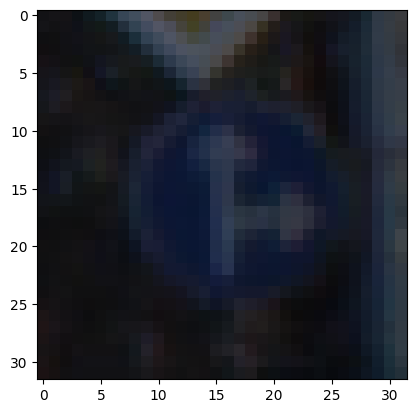

In [ ]:
i = 1000
plt.imshow(X_train[i])#pick an image with the index of 1000 in the data (shows the image)
y_train[i] #shows the actual output of the image)
# the output is 17 = 'no entry' from the Prob Def. information & matches the picture

41

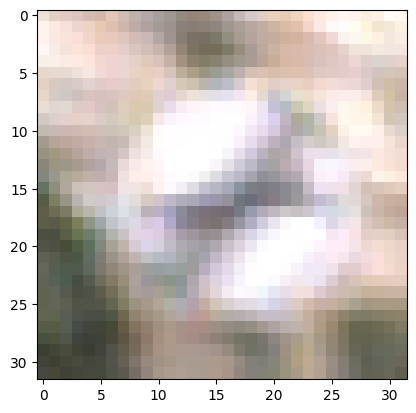

In [ ]:
i = 40
plt.imshow(X_train[i])
y_train[i]# output is 100km/h which matches output class 7

41

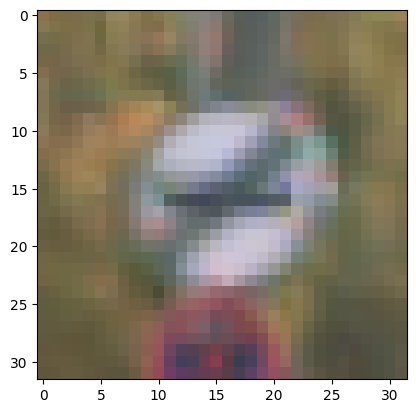

In [ ]:
i = 90
plt.imshow(X_train[i])
y_train[i]

41

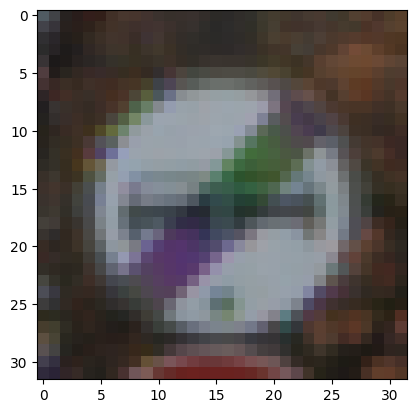

In [ ]:
i = 76
plt.imshow(X_train[i])
y_train[i]

23

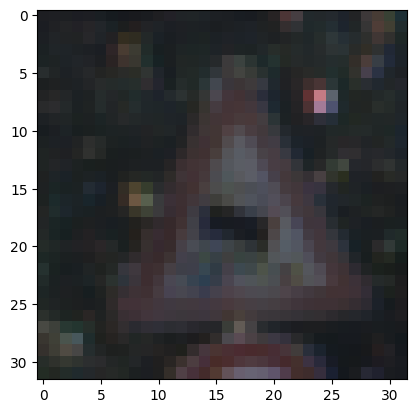

In [ ]:
i = 1999
plt.imshow(X_train[i])
y_train[i]

25

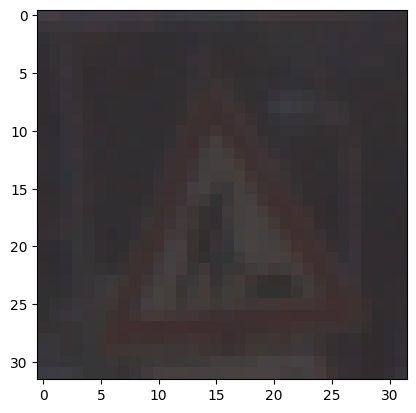

In [ ]:
i = 4400
plt.imshow(X_validation[i])
y_validation[i]

38

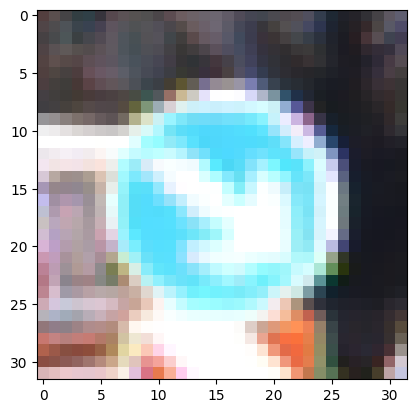

In [ ]:
i = 800
plt.imshow(X_test[i])
y_test[i]

# Data Preparation

In [ ]:
from sklearn.utils import shuffle #shuffle the data
X_train, y_train = shuffle(X_train, y_train)

In [ ]:
# Changed the images from color to gray scale
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True) #keep the dimensions of the img the same, avg. 3 images & make them one img
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [ ]:
X_train_gray.shape # dimensions (32 x 32 by 1 as opposed to 32 x 32 by 3 which was previous shape)

(34799, 32, 32, 1)

In [ ]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [ ]:
X_test_gray.shape

(12630, 32, 32, 1)

In [ ]:
#Normalization so all pixels from images range from -1 to 1
X_train_gray_norm = (X_train_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [ ]:
X_train_gray_norm

array([[[[ 0.16145833],
         [ 0.15885417],
         [ 0.16145833],
         ...,
         [ 0.1796875 ],
         [ 0.15625   ],
         [ 0.15885417]],

        [[ 0.18489583],
         [ 0.16666667],
         [ 0.16145833],
         ...,
         [ 0.15885417],
         [ 0.15104167],
         [ 0.15104167]],

        [[ 0.14583333],
         [ 0.1484375 ],
         [ 0.16666667],
         ...,
         [ 0.15625   ],
         [ 0.15625   ],
         [ 0.16145833]],

        ...,

        [[-0.32291667],
         [-0.2734375 ],
         [-0.2890625 ],
         ...,
         [-0.17708333],
         [-0.1640625 ],
         [-0.1640625 ]],

        [[-0.27604167],
         [-0.21354167],
         [-0.22916667],
         ...,
         [-0.13541667],
         [-0.13541667],
         [-0.1328125 ]],

        [[-0.31770833],
         [-0.30208333],
         [-0.36458333],
         ...,
         [-0.1640625 ],
         [-0.2265625 ],
         [-0.20833333]]],


       [[[-0.73697917],


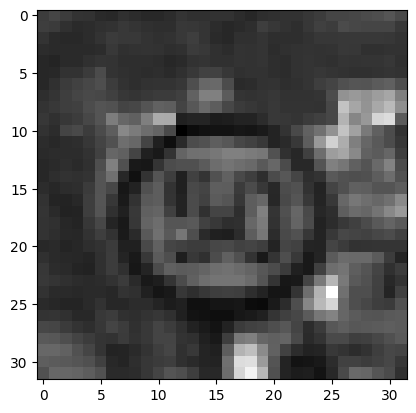

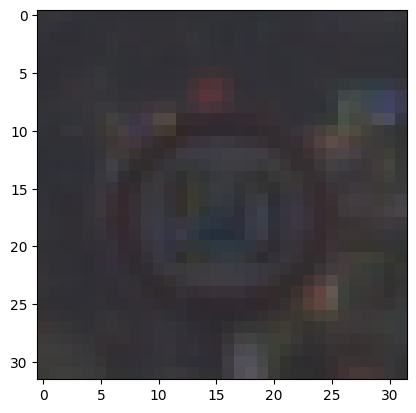

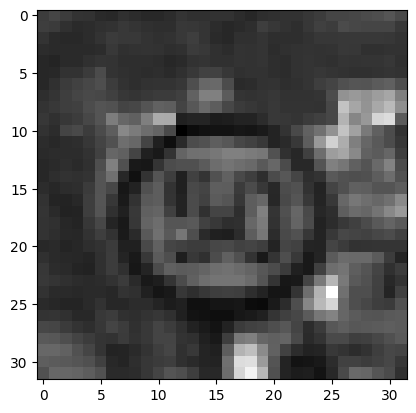

In [ ]:
# Performed visualizations
i = 89
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')#gray scale
plt.figure()
plt.imshow(X_train[i])#original
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray') #normalized picture which will be used for modeling

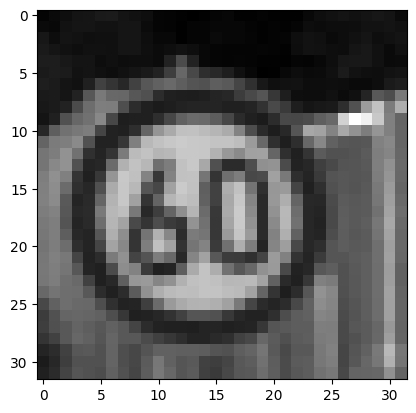

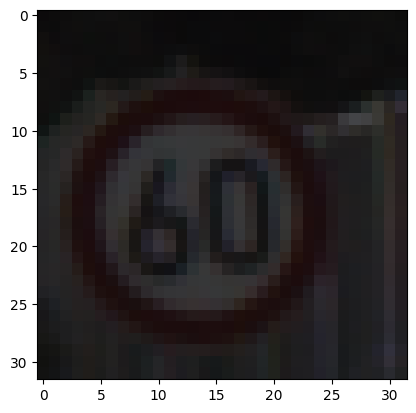

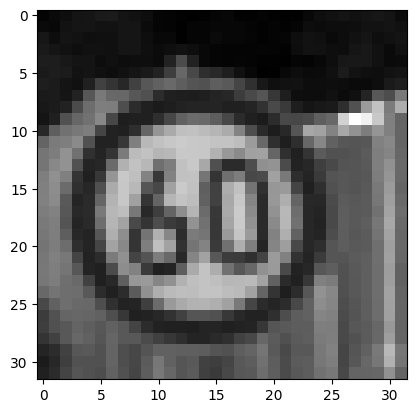

In [ ]:
i = 800
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

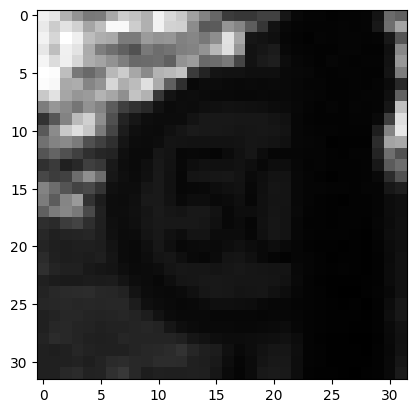

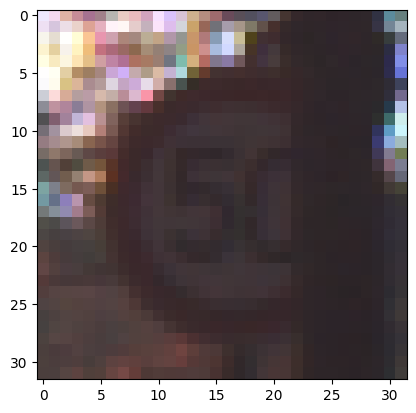

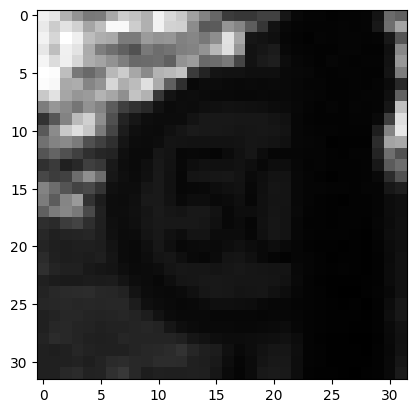

In [ ]:
i = 600
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [ ]:
cnn_model = Sequential()

# Conv2D layers should use positional arguments
cnn_model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(32, 32, 1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(16, (5, 5), activation='relu'))  # Also use positional arguments
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 120, activation='relu'))
cnn_model.add(Dense(units = 84, activation='relu'))
cnn_model.add(Dense(units = 43, activation='softmax'))

In [ ]:
# Compile the model
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy']) #loss is categorical crossentropy because we have multiple classes (binary if there were only 2)

In [ ]:
# Fit the model
history = cnn_model.fit(X_train_gray_norm,
              y_train,
              batch_size = 500,
              epochs = 50,
              verbose = 1,
              validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/50
70/70 [==============================] - 3s 10ms/step - loss: 3.1381 - accuracy: 0.1904 - val_loss: 2.5442 - val_accuracy: 0.3535
Epoch 2/50
70/70 [==============================] - 0s 7ms/step - loss: 1.5470 - accuracy: 0.5721 - val_loss: 1.2443 - val_accuracy: 0.6440
Epoch 3/50
70/70 [==============================] - 0s 7ms/step - loss: 0.8715 - accuracy: 0.7513 - val_loss: 0.9130 - val_accuracy: 0.7408
Epoch 4/50
70/70 [==============================] - 0s 6ms/step - loss: 0.6407 - accuracy: 0.8174 - val_loss: 0.7697 - val_accuracy: 0.7739
Epoch 5/50
70/70 [==============================] - 0s 7ms/step - loss: 0.5162 - accuracy: 0.8586 - val_loss: 0.6931 - val_accuracy: 0.7950
Epoch 6/50
70/70 [==============================] - 0s 6ms/step - loss: 0.4417 - accuracy: 0.8814 - val_loss: 0.6435 - val_accuracy: 0.8134
Epoch 7/50
70/70 [==============================] - 0s 7ms/step - loss: 0.3802 - accuracy: 0.8991 - val_loss: 0.6224 - val_accuracy: 0.8327
Epoch 8/50
70/70 [=

# Model Evaluation

In [ ]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 1s 3ms/step - loss: 1.2626 - accuracy: 0.8692
Test Accuracy: 0.8692002892494202


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

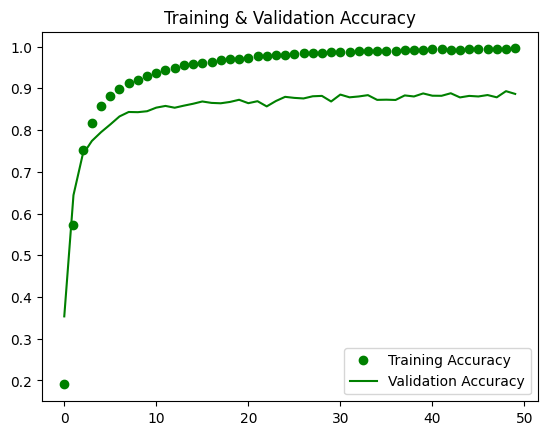

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'go', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'g', label = 'Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend();

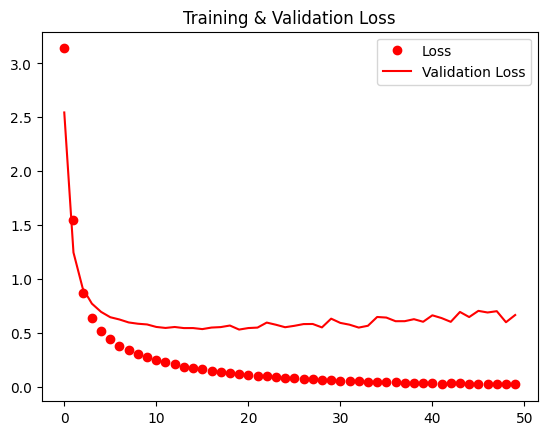

In [ ]:
epochs = range(len(accuracy))

plt.plot(epochs, loss, 'ro', label = 'Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training & Validation Loss')
plt.legend();

In [ ]:
# Make predictions
predicted_classes = np.argmax(cnn_model.predict(X_test_gray_norm), axis=1) #np.argmax returns the index of the maximum value in an array, which, in this case, corresponds to the class with the highest probability.
y_true = y_test

395/395 [==============================] - 1s 2ms/step


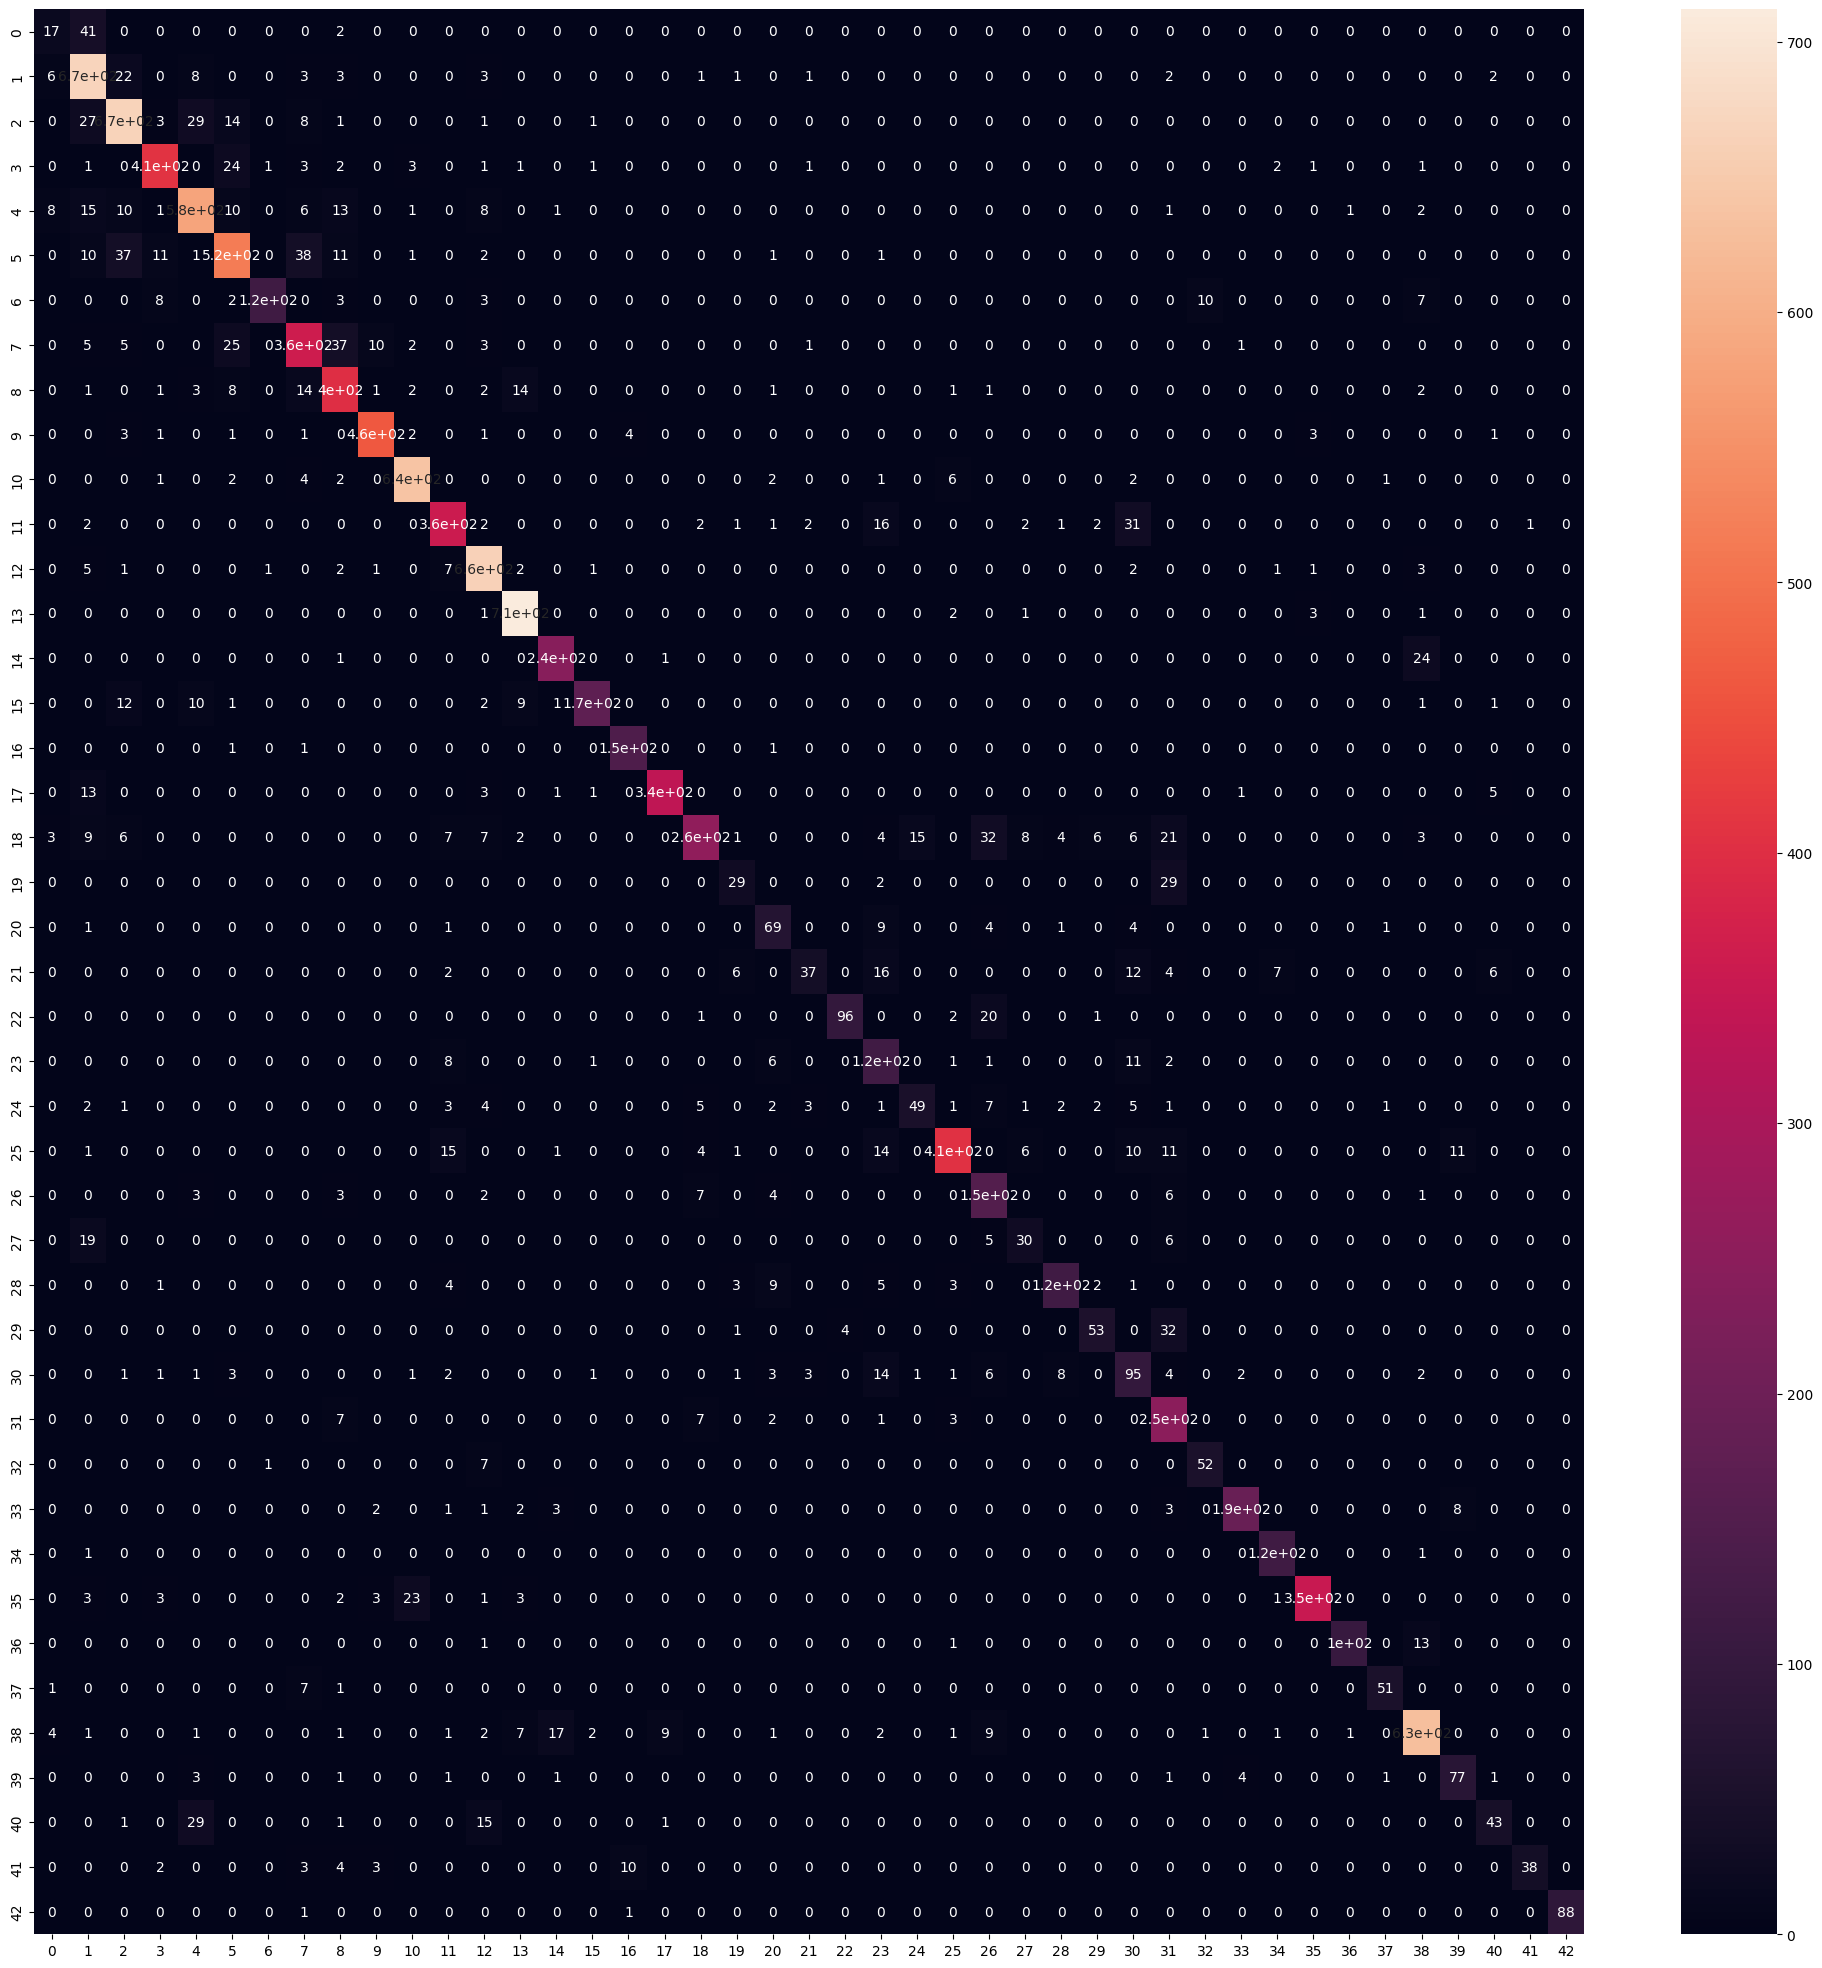

In [ ]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot= True);

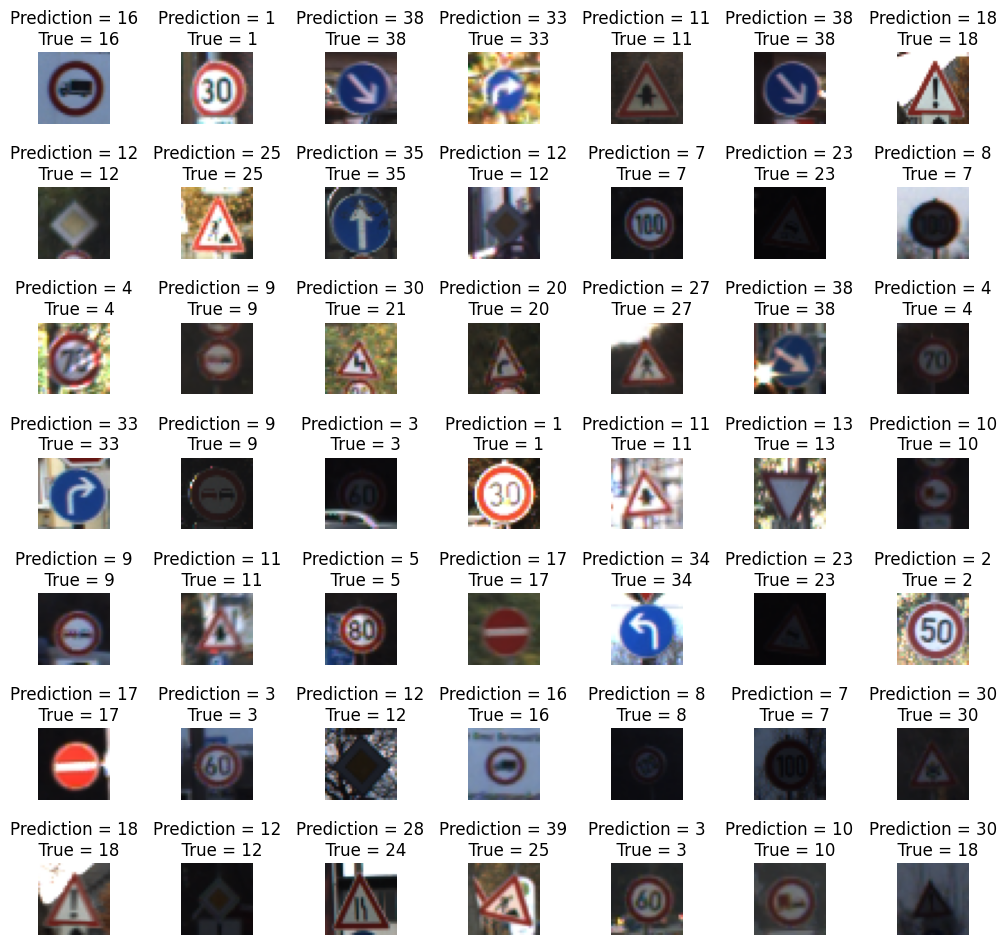

In [ ]:
#Plot images of true labels vs predictions
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(X_test[i])
  axes[i].set_title('Prediction = {}\n  True = {}'.format(predicted_classes[i], y_true[i])) #set titles above each image of true & predicted labels ("\" - used as line continuation)
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)